In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Instrumentos'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'bajo' in filename:
      y.append(0) #indice 0 bajo
    elif 'cello' in filename: #indice 1 cello
      y.append(1)
    elif 'guitarra' in filename: #indice 2 guitarra
      y.append(2)
    elif 'guitarraE' in filename: #indice 3 guitarraE
      y.append(3)
    elif 'violin' in filename: #indice 4 violin
      y.append(4)
    if filename.endswith(".jpg"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((244, 244))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas

array([[[254, 254, 254],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [253, 253, 253],
        [252, 252, 252],
        [233, 233, 233]],

       [[234, 234, 234],
        [233, 233, 233],
        [236, 236, 236],
        ...,
        [233, 233, 233],
        [235, 235, 235],
        [249, 249, 249]],

       [[250, 250, 250],
        [250, 250, 250],
        [249, 249, 249],
        ...,
        [250, 250, 250],
        [249, 249, 249],
        [235, 235, 235]],

       ...,

       [[234, 234, 234],
        [233, 233, 233],
        [236, 236, 236],
        ...,
        [233, 233, 233],
        [235, 235, 235],
        [249, 249, 249]],

       [[251, 251, 251],
        [250, 250, 250],
        [248, 248, 248],
        ...,
        [250, 250, 250],
        [249, 249, 249],
        [236, 236, 236]],

       [[236, 236, 236],
        [235, 235, 235],
        [237, 237, 237],
        ...,
        [235, 235, 235],
        [236, 236, 236],
        [248, 248, 248]]], dtype=uint8)
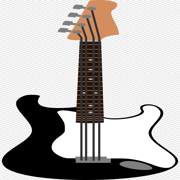

In [ ]:
np.array(img)

In [ ]:
def verificar_imgs(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                # Imprime el tamaño y formato de cada imagen
                print(f'Imagen: {filename}, Tamaño: {img.size}, Formato: {img.mode}')
        except Exception as e:
            print(f'Error al procesar {filename}: {e}')

# Llama a la función para verificar las imágenes
verificar_imgs(folder_path)

Imagen: bajo14.jpg, Tamaño: (1200, 675), Formato: RGB
Imagen: bajo19.jpg, Tamaño: (1280, 720), Formato: RGB
Imagen: bajo7.jpg, Tamaño: (1368, 768), Formato: RGB
Imagen: bajo8.jpg, Tamaño: (219, 500), Formato: RGB
Imagen: bajo13.jpg, Tamaño: (460, 500), Formato: RGB
Imagen: bajo18.jpg, Tamaño: (650, 650), Formato: RGB
Imagen: bajo4.jpg, Tamaño: (770, 425), Formato: RGB
Imagen: bajo20.jpg, Tamaño: (1200, 1600), Formato: RGB
Imagen: bajo10.jpg, Tamaño: (240, 320), Formato: RGB
Imagen: bajo6.jpg, Tamaño: (299, 168), Formato: RGB
Imagen: bajo1.jpg, Tamaño: (980, 980), Formato: RGB
Imagen: bajo5.jpg, Tamaño: (275, 183), Formato: RGB
Imagen: guitarraE1.jpg, Tamaño: (1024, 1024), Formato: RGB
Imagen: guitarraE3.jpg, Tamaño: (770, 422), Formato: RGB
Imagen: guitarraE4.jpg, Tamaño: (900, 1200), Formato: RGB
Imagen: guitarraE6.jpg, Tamaño: (625, 750), Formato: RGB
Imagen: guitarraE7.jpg, Tamaño: (550, 309), Formato: RGB
Imagen: guitarraE9.jpg, Tamaño: (686, 386), Formato: RGB
Imagen: guitarraE10.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=43, stratify=y)

In [ ]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(244, 244, 3)))  # Aplanar la imagen
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(, activation='relu'))
model.add(Dense(5, activation='softmax')) #5 es el numero de clases

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train

[2,
 1,
 4,
 4,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 4,
 2,
 4,
 2,
 4,
 0,
 0,
 0,
 2,
 4,
 1,
 4,
 2,
 0,
 4,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 4,
 2,
 1,
 2,
 2,
 4,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 4,
 2,
 0,
 2,
 2,
 1,
 4,
 0,
 0,
 2,
 4,
 4,
 4,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 4,
 2,
 2,
 0]

In [ ]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_train

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [ ]:
X_train.shape

(80, 180, 180, 3)

In [ ]:
y_train.shape

(80, 5)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [ ]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
%time model.fit(X_train,y_train,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 0.1461 - loss: 19.3610
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.2766 - loss: 29.9284
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.3477 - loss: 30.0348
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.3953 - loss: 21.8195
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.3703 - loss: 6.9501
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.5063 - loss: 6.3998
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.3547 - loss: 6.4340
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.5273 - loss: 6.7105
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.5805 - loss: 2.4843
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.5977 - loss: 4.1352
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 0.7164 - loss: 1.3143
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accur

In [ ]:
%time y_train

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs


array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1.

In [ ]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [ ]:
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)

(20,)
(20, 180, 180, 3)
(80, 5)
(80, 180, 180, 3)


In [ ]:
#Verificamos su forma
y_test

array([0, 2, 1, 1, 2, 4, 2, 1, 2, 4, 2, 2, 2, 2, 4, 0, 1, 4, 0, 0])

In [ ]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [ ]:
#Revisamos el resultado
y_pred

array([[7.71879554e-02, 1.38869385e-11, 9.22811985e-01, 0.00000000e+00,
        6.45957954e-08],
       [7.29123950e-02, 2.04326191e-11, 9.27087605e-01, 0.00000000e+00,
        1.44695322e-08],
       [4.68834210e-03, 1.46301527e-05, 9.91031468e-01, 0.00000000e+00,
        4.26553236e-03],
       [3.66848581e-05, 2.99095445e-05, 2.20631316e-01, 0.00000000e+00,
        7.79302061e-01],
       [4.57777162e-07, 1.92281399e-10, 3.22514981e-01, 0.00000000e+00,
        6.77484512e-01],
       [9.70976591e-01, 9.43465158e-03, 1.89858843e-02, 0.00000000e+00,
        6.02858781e-04],
       [1.25820652e-01, 7.96422114e-07, 8.74157548e-01, 0.00000000e+00,
        2.10324251e-05],
       [1.66253258e-07, 3.87095474e-02, 8.16771761e-03, 0.00000000e+00,
        9.53122497e-01],
       [2.32181316e-10, 9.99999702e-01, 6.45813572e-08, 0.00000000e+00,
        1.47272090e-07],
       [7.53425166e-16, 6.43367581e-09, 1.21163549e-02, 0.00000000e+00,
        9.87883508e-01],
       [9.36735928e-01, 3.1087

In [ ]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.3
Precisión por clase: [0.         0.         0.44444444 0.28571429] -> 0.18253968253968253
Sensibilidad por clase: [0.  0.  0.5 0.5] -> 0.25
F1 Score por clase: [0.         0.         0.47058824 0.36363636] -> 0.20855614973262032


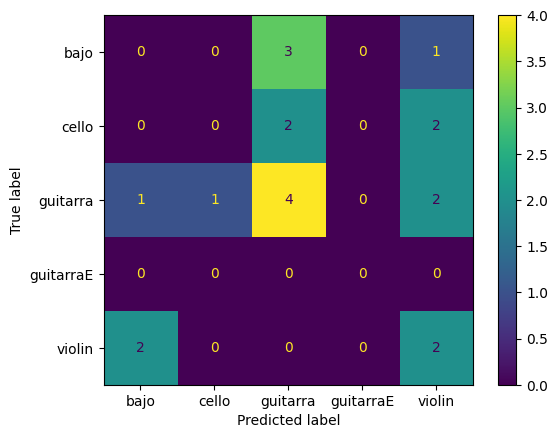

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=np.arange(5)) # labels especifica las clases a incluir

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['bajo', 'cello', 'guitarra', 'guitarraE', 'violin']

# Plotear la matriz de confusión
disp.plot()

# Mostrar la matriz de confusión
plt.show()